In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import obspy
from os.path import join
from sklearn.preprocessing import scale
import pyasdf
%matplotlib inline
import json

In [2]:
df=pd.read_csv("./misfit_withsnr.csv",index_col=0)

In [3]:
df

gcmtid depth              process_flag           p_z  \
0     200708020237A  d-10  preprocessed_10s_to_120s  1.943146e-05   
1     200708020237A  d-10  preprocessed_20s_to_120s  1.210708e-05   
2     200708020237A  d-10  preprocessed_40s_to_120s  6.022930e-06   
3     200708020237A  d-15  preprocessed_10s_to_120s  2.020904e-05   
4     200708020237A  d-15  preprocessed_20s_to_120s  1.202542e-05   
5     200708020237A  d-15  preprocessed_40s_to_120s  6.076990e-06   
6     200708020237A   d-5  preprocessed_10s_to_120s  1.882439e-05   
7     200708020237A   d-5  preprocessed_20s_to_120s  1.228513e-05   
8     200708020237A   d-5  preprocessed_40s_to_120s  5.973459e-06   
9     200708020237A    d0  preprocessed_10s_to_120s  1.915812e-05   
10    200708020237A    d0  preprocessed_20s_to_120s  1.277554e-05   
11    200708020237A    d0  preprocessed_40s_to_120s  5.966737e-06   
12    200708020237A   d10  preprocessed_10s_to_120s  2.308675e-05   
13    200708020237A   d10  preprocessed_20s_to_120s  1.546014e-05   
14    200708020237A   d10  preprocessed_40s_to_120s  7.421349e-06   
15    200708020237A   d15  preprocessed_10s_to_120s  2.250640e-05   
16    200708020237A   d15  preprocessed_20s_to_120s  1.637235e-05   
17    200708020237A   d15  preprocessed_40s_to_120s  8.348934e-06   
18    200708020237A    d5  preprocessed_10s_to_120s  2.297107e-05   
19    200708020237A    d5  preprocessed_20s_to_120s  1.335451e-05   
20    200708020237A    d5  preprocessed_40s_to_120s  6.470979e-06   
21    200710061238A  d-10  preprocessed_10s_to_120s  1.188314e-05   
22    200710061238A  d-10  preprocessed_20s_to_120s  5.597694e-06   
23    200710061238A  d-10  preprocessed_40s_to_120s  2.258069e-06   
24    200710061238A  d-15  preprocessed_10s_to_120s  1.177765e-05   
25    200710061238A  d-15  preprocessed_20s_to_120s  5.553518e-06   
26    200710061238A  d-15  preprocessed_40s_to_120s  2.145002e-06   
27    200710061238A   d-5  preprocessed_10s_to_120s  1.176032e-05   
28    200710061238A   d-5  preprocessed_20s_to_120s  5.496318e-06   
29    200710061238A   d-5  preprocessed_40s_to_120s  2.317242e-06   
...             ...   ...                       ...           ...   
2700  201802112314A   d10  preprocessed_10s_to_120s  8.038923e-06   
2701  201802112314A   d10  preprocessed_20s_to_120s  3.132280e-06   
2702  201802112314A   d10  preprocessed_40s_to_120s  1.210436e-06   
2703  201802112314A   d15  preprocessed_10s_to_120s  8.479272e-06   
2704  201802112314A   d15  preprocessed_20s_to_120s  3.257612e-06   
2705  201802112314A   d15  preprocessed_40s_to_120s  1.300041e-06   
2706  201802112314A    d5  preprocessed_10s_to_120s  7.900117e-06   
2707  201802112314A    d5  preprocessed_20s_to_120s  3.021690e-06   
2708  201802112314A    d5  preprocessed_40s_to_120s  1.146576e-06   
2709  201803181800A  d-10  preprocessed_10s_to_120s  5.479818e-07   
2710  201803181800A  d-10  preprocessed_20s_to_120s  3.407532e-07   
2711  201803181800A  d-10  preprocessed_40s_to_120s  1.657255e-07   
2712  201803181800A  d-15  preprocessed_10s_to_120s  5.735803e-07   
2713  201803181800A  d-15  preprocessed_20s_to_120s  3.642106e-07   
2714  201803181800A  d-15  preprocessed_40s_to_120s  1.669913e-07   
2715  201803181800A   d-5  preprocessed_10s_to_120s  5.397226e-07   
2716  201803181800A   d-5  preprocessed_20s_to_120s  3.443375e-07   
2717  201803181800A   d-5  preprocessed_40s_to_120s  1.600597e-07   
2718  201803181800A    d0  preprocessed_10s_to_120s  5.566355e-07   
2719  201803181800A    d0  preprocessed_20s_to_120s  3.436339e-07   
2720  201803181800A    d0  preprocessed_40s_to_120s  1.597336e-07   
2721  201803181800A   d10  preprocessed_10s_to_120s  5.532012e-07   
2722  201803181800A   d10  preprocessed_20s_to_120s  3.643852e-07   
2723  201803181800A   d10  preprocessed_40s_to_120s  1.591294e-07   
2724  201803181800A   d15  preprocessed_10s_to_120s  5.748762e-07   
2725  201803181800A   d15  preprocessed_20s_to_120s  3.528036e-07   
2726  20180

In [4]:
snr_df=pd.DataFrame(columns=["gcmtid","depth","process_flag","pz","pr","sz","sr","st","surfz_mt","surfr_mt","pall","svall","shall","surfmtall","theall","theall_nocategory"])

In [5]:
# ratio_pz=1
# ratio_sz=2.2142594869496626
# ratio_pr=1.0692417957028808
# ratio_sr=3.1196479239044015
# ratio_st=3.847066178448849
for index,row in df.iterrows():
#     pz=row.p_z/ratio_pz
#     pr=row.p_r/ratio_pr
#     sz=row.s_z/ratio_sz
#     sr=row.s_r/ratio_sr
#     st=row.s_t/ratio_st
    pz=row.p_z*1
    pr=row.p_r*0.74
    sz=row.s_z*0.32
    sr=row.s_r*0.28
    st=row.s_t*0.20
    surfz=row.surf_z*0.15
    surfr=row.surf_r*0.17
    
    pall=0.5*(pz+pr)
    svall=0.5*(sz+sr)
    shall=st
    surfmtall=0.5*(row.surf_z_mt+row.surf_r_mt)
    surfall=0.5*(surfz+surfr)
    theall=(pall+svall+shall+surfall)/4
    theall_nocategory=(pall+svall+shall)/3
    
    snr_df.loc[index]=[row.gcmtid,row.depth,row.process_flag,pz,pr,sz,sr,st,row.surf_z_mt,row.surf_r_mt,pall,svall,shall,surfmtall,theall,theall_nocategory]

In [6]:
snr_df

gcmtid depth              process_flag            pz  \
0     200708020237A  d-10  preprocessed_10s_to_120s  1.943146e-05   
1     200708020237A  d-10  preprocessed_20s_to_120s  1.210708e-05   
2     200708020237A  d-10  preprocessed_40s_to_120s  6.022930e-06   
3     200708020237A  d-15  preprocessed_10s_to_120s  2.020904e-05   
4     200708020237A  d-15  preprocessed_20s_to_120s  1.202542e-05   
5     200708020237A  d-15  preprocessed_40s_to_120s  6.076990e-06   
6     200708020237A   d-5  preprocessed_10s_to_120s  1.882439e-05   
7     200708020237A   d-5  preprocessed_20s_to_120s  1.228513e-05   
8     200708020237A   d-5  preprocessed_40s_to_120s  5.973459e-06   
9     200708020237A    d0  preprocessed_10s_to_120s  1.915812e-05   
10    200708020237A    d0  preprocessed_20s_to_120s  1.277554e-05   
11    200708020237A    d0  preprocessed_40s_to_120s  5.966737e-06   
12    200708020237A   d10  preprocessed_10s_to_120s  2.308675e-05   
13    200708020237A   d10  preprocessed_20s_to_120s  1.546014e-05   
14    200708020237A   d10  preprocessed_40s_to_120s  7.421349e-06   
15    200708020237A   d15  preprocessed_10s_to_120s  2.250640e-05   
16    200708020237A   d15  preprocessed_20s_to_120s  1.637235e-05   
17    200708020237A   d15  preprocessed_40s_to_120s  8.348934e-06   
18    200708020237A    d5  preprocessed_10s_to_120s  2.297107e-05   
19    200708020237A    d5  preprocessed_20s_to_120s  1.335451e-05   
20    200708020237A    d5  preprocessed_40s_to_120s  6.470979e-06   
21    200710061238A  d-10  preprocessed_10s_to_120s  1.188314e-05   
22    200710061238A  d-10  preprocessed_20s_to_120s  5.597694e-06   
23    200710061238A  d-10  preprocessed_40s_to_120s  2.258069e-06   
24    200710061238A  d-15  preprocessed_10s_to_120s  1.177765e-05   
25    200710061238A  d-15  preprocessed_20s_to_120s  5.553518e-06   
26    200710061238A  d-15  preprocessed_40s_to_120s  2.145002e-06   
27    200710061238A   d-5  preprocessed_10s_to_120s  1.176032e-05   
28    200710061238A   d-5  preprocessed_20s_to_120s  5.496318e-06   
29    200710061238A   d-5  preprocessed_40s_to_120s  2.317242e-06   
...             ...   ...                       ...           ...   
2700  201802112314A   d10  preprocessed_10s_to_120s  8.038923e-06   
2701  201802112314A   d10  preprocessed_20s_to_120s  3.132280e-06   
2702  201802112314A   d10  preprocessed_40s_to_120s  1.210436e-06   
2703  201802112314A   d15  preprocessed_10s_to_120s  8.479272e-06   
2704  201802112314A   d15  preprocessed_20s_to_120s  3.257612e-06   
2705  201802112314A   d15  preprocessed_40s_to_120s  1.300041e-06   
2706  201802112314A    d5  preprocessed_10s_to_120s  7.900117e-06   
2707  201802112314A    d5  preprocessed_20s_to_120s  3.021690e-06   
2708  201802112314A    d5  preprocessed_40s_to_120s  1.146576e-06   
2709  201803181800A  d-10  preprocessed_10s_to_120s  5.479818e-07   
2710  201803181800A  d-10  preprocessed_20s_to_120s  3.407532e-07   
2711  201803181800A  d-10  preprocessed_40s_to_120s  1.657255e-07   
2712  201803181800A  d-15  preprocessed_10s_to_120s  5.735803e-07   
2713  201803181800A  d-15  preprocessed_20s_to_120s  3.642106e-07   
2714  201803181800A  d-15  preprocessed_40s_to_120s  1.669913e-07   
2715  201803181800A   d-5  preprocessed_10s_to_120s  5.397226e-07   
2716  201803181800A   d-5  preprocessed_20s_to_120s  3.443375e-07   
2717  201803181800A   d-5  preprocessed_40s_to_120s  1.600597e-07   
2718  201803181800A    d0  preprocessed_10s_to_120s  5.566355e-07   
2719  201803181800A    d0  preprocessed_20s_to_120s  3.436339e-07   
2720  201803181800A    d0  preprocessed_40s_to_120s  1.597336e-07   
2721  201803181800A   d10  preprocessed_10s_to_120s  5.532012e-07   
2722  201803181800A   d10  preprocessed_20s_to_120s  3.643852e-07   
2723  201803181800A   d10  preprocessed_40s_to_120s  1.591294e-07   
2724  201803181800A   d15  preprocessed_10s_to_120s  5.748762e-07   
2725  201803181800A   d15  preprocessed_20s_to_120s  3.528036e-07   
2726  20180

In [7]:
cmt_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/data/cmts"
depth_mapper={}
gcmtid_keys=set(df.gcmtid)
gcmtid_keys=sorted(gcmtid_keys)
for gcmtid in gcmtid_keys:
    depth_mapper[gcmtid]=obspy.read_events(join(cmt_dir,gcmtid))[0].origins[0].depth/1000
depth_range=[-15,-10,-5,0,5,10,15]

In [8]:
def plot_single_figure(gcmtid,process_flag):
    depth=depth_mapper[gcmtid]
    x_perdep=depth_range
    x_acdep=[]
    if(depth<20):
        x_acdep=list(np.linspace(5,depth,4))+[depth+5,depth+10,depth+15]
    else:
        x_acdep=[depth-15,depth-10,depth-5,depth,depth+5,depth+10,depth+15]
    y_p_all,y_sv_all,y_sh_all,y_ray_all,y_theall,y_nocatall=[],[],[],[],[],[]
    df_gcmtid=snr_df[snr_df.gcmtid==gcmtid]
    df_gcmtid_processflag=df_gcmtid[df_gcmtid.process_flag==process_flag]
    for thedepth in depth_range:
        depth_name=f"d{thedepth}"
        df_gcmtid_processflag_depth=df_gcmtid_processflag[df_gcmtid_processflag.depth==depth_name]
        thedf=df_gcmtid_processflag_depth
        
        y_p_all.append(thedf.pall.values[0])
        y_sv_all.append(thedf.svall.values[0])
        y_sh_all.append(thedf.shall.values[0])
        y_ray_all.append(thedf.surfmtall.values[0])
        y_theall.append(thedf.theall.values[0])
        y_nocatall.append(thedf.theall_nocategory.values[0])
    
    # add surf_mt and theall together
    y_theall_withsurf=(((scale(y_theall, axis=0, with_mean=True, with_std=True, copy=True )+scale(y_ray_all, axis=0, with_mean=True, with_std=True, copy=True ))/2)+1)/2
    
    plt.figure(figsize=(14,6))
    plot_list=[y_p_all,y_sv_all,y_sh_all,y_ray_all,y_theall,y_nocatall,y_theall_withsurf]
    plot_name=["p_all","sv_all","sh_all","ray_all","theall","theall_nosurf","theall_withsurfmt"]
    for index,they in enumerate(plot_list):
        ax=plt.subplot(2,4,index+1)
        ax.plot(x_perdep,they,color="k")
        ax.scatter(x_perdep,they,color="r")
        ax.set_title(plot_name[index])
    plt.suptitle(f"{gcmtid},{depth}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()
    xticks=[f"d{i}({j})" for i,j in zip(x_perdep,x_acdep)]                 
    print(xticks)

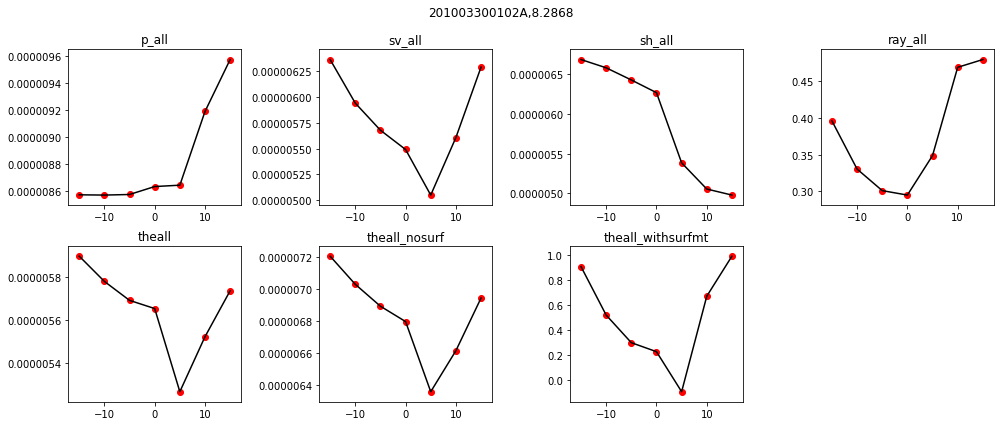

['d-15(5.0)', 'd-10(6.0956)', 'd-5(7.1912)', 'd0(8.2868)', 'd5(13.2868)', 'd10(18.2868)', 'd15(23.2868)']


In [9]:
plot_single_figure("201003300102A","preprocessed_10s_to_120s")

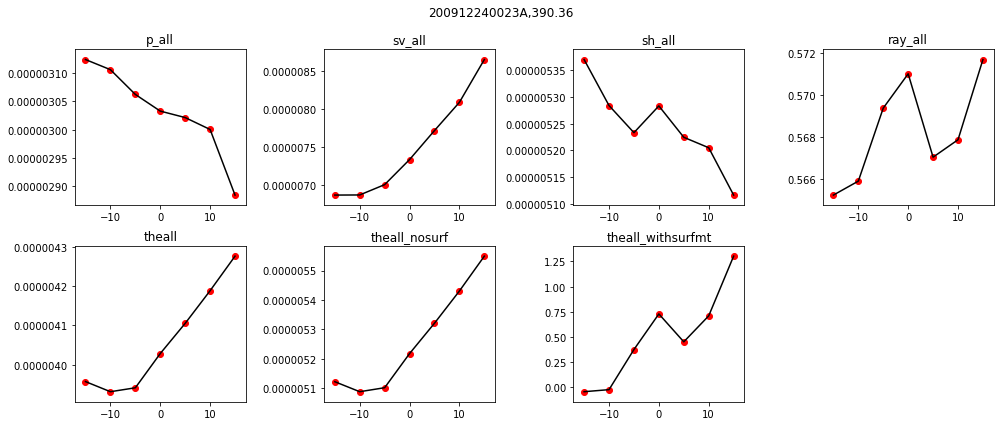

['d-15(375.36)', 'd-10(380.36)', 'd-5(385.36)', 'd0(390.36)', 'd5(395.36)', 'd10(400.36)', 'd15(405.36)']


In [10]:
# 200912240023A
plot_single_figure("200912240023A","preprocessed_10s_to_120s")

In [35]:
def combine_json_dict(body_dict, surf_dict):
    """
    combine the json dict for both the surface wave and the body wave
    """
    for net_sta in body_dict:
        for level1_key in ["misfit_r", "misfit_t", "misfit_z", "property_times"]:
            for level2_key in body_dict[net_sta][level1_key]:
                body_dict[net_sta][level1_key][level2_key] = body_dict[net_sta][
                    level1_key][level2_key] or surf_dict[net_sta][level1_key][level2_key]

        for level1_key in ["window_length", "amplitude"]:
            for level2_key in body_dict[net_sta][level1_key]:
                for level3_key in body_dict[net_sta][level1_key][level2_key]:
                    body_dict[net_sta][level1_key][level2_key][level3_key] = body_dict[net_sta][level1_key][
                        level2_key][level3_key] or surf_dict[net_sta][level1_key][level2_key][level3_key]
    return body_dict


In [36]:
def get_windows(starttime, endtime,  property_times):
    ptime = property_times["first_p"]
    stime = property_times["first_s"]
    surftime = property_times["surface_wave"]
    is_close = property_times["local_station"]
    gcarc = property_times["gcarc"]

    result = {
        "pn": None,
        "p": None,
        "s": None,
        "surf": None
    }

    # different conditions
    if(gcarc < 10):  # local stations
        if(is_close):
            result["pn"] = (starttime, starttime+60)
        else:
            if(ptime < 20):
                result["pn"] = (starttime, starttime+stime)
                result["surf"] = (starttime+stime, starttime+stime+60)
            elif(20 <= ptime < 60):
                result["pn"] = (starttime+ptime-10, starttime+ptime+30)
                result["surf"] = (starttime+stime-10, starttime+stime+110)
            else:
                result["pn"] = (starttime+ptime-20, starttime+ptime+60)
                result["surf"] = (starttime+stime-10, starttime+stime+180)
    else:  # regional stations
        win_surface_start = starttime+surftime - 40
        win_surface_end = starttime+surftime + 180

        result["p"] = (starttime+ptime-20, starttime+ptime+60)
        result["s"] = (starttime+stime-20, starttime+stime+80)
        if(endtime-win_surface_start < 100):
            pass
        elif(win_surface_end > endtime):
            result["surf"] = (win_surface_start, endtime)
        else:
            result["surf"] = (win_surface_start, win_surface_end)

    return result


### Plot a single figure for the use of relocation.

In [54]:
def single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf):
    # open asdf files
    data_asdf=pyasdf.ASDFDataSet(data_asdf_path,mode="r")
    zero_asdf=pyasdf.ASDFDataSet(zero_asdf_path,mode="r")
    opt_asdf=pyasdf.ASDFDataSet(opt_asdf_path,mode="r")
    # get waveform streams
    data_sg=data_asdf.waveforms[net_sta]
    data_tag=data_sg.get_waveform_tags()[0]
    data_st=data_sg[data_tag].copy()
    zero_sg=zero_asdf.waveforms[net_sta]
    zero_tag=zero_sg.get_waveform_tags()[0]
    zero_st=zero_sg[zero_tag].copy()
    opt_sg=opt_asdf.waveforms[net_sta]
    opt_tag=opt_sg.get_waveform_tags()[0]
    opt_st=opt_sg[opt_tag].copy() 
    # get windows information
    windows_body_dict=None
    windows_surf_dict=None
    with open(windows_json_body,"r") as f:
        windows_body_dict=json.load(f)
    with open(windows_json_surf,"r") as f:
        windows_surf_dict=json.load(f)
    windows_dict=combine_json_dict(windows_body_dict, windows_surf_dict)
    # get windows
    property_times=windows_dict[net_sta]["property_times"]
    starttime=data_st[0].stats.starttime
    endtime=data_st[0].stats.endtime
    windows=get_windows(starttime, endtime,  property_times)
    
    ##################
    # plot zero
    plt.figure(figsize=(14,30))
    x_data=None
    x_sync=None
    y_data=None
    y_sync=None
    
    # pz
    ax=plt.subplot(7,2,1)
    if(windows["pn"]):
        trace_data=data_st[2].slice(windows["pn"][0],windows["pn"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=zero_st[2].slice(windows["pn"][0],windows["pn"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    elif(windows["p"]):
        trace_data=data_st[2].slice(windows["p"][0],windows["p"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=zero_st[2].slice(windows["p"][0],windows["p"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")
    ax.set_title("raw")
    ax.set_ylabel("pz")
    
    # pr
    ax=plt.subplot(7,2,3)
    if(windows["pn"]):
        trace_data=data_st[0].slice(windows["pn"][0],windows["pn"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=zero_st[0].slice(windows["pn"][0],windows["pn"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    elif(windows["p"]):
        trace_data=data_st[0].slice(windows["p"][0],windows["p"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=zero_st[0].slice(windows["p"][0],windows["p"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")
    ax.set_ylabel("pr")
    
    # sz
    ax=plt.subplot(7,2,5)
    if(windows["s"]):
        trace_data=data_st[2].slice(windows["s"][0],windows["s"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=zero_st[2].slice(windows["s"][0],windows["s"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")  
    ax.set_ylabel("sz")
    
    # sr
    ax=plt.subplot(7,2,7)
    if(windows["s"]):
        trace_data=data_st[0].slice(windows["s"][0],windows["s"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=zero_st[0].slice(windows["s"][0],windows["s"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")
    ax.set_ylabel("sr")
    
    # st
    ax=plt.subplot(7,2,9)
    if(windows["s"]):
        trace_data=data_st[1].slice(windows["s"][0],windows["s"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=zero_st[1].slice(windows["s"][0],windows["s"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")
    ax.set_ylabel("st")
    
    # ray z
    ax=plt.subplot(7,2,11)
    if(windows["surf"]):
        trace_data=data_st[2].slice(windows["surf"][0],windows["surf"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=zero_st[2].slice(windows["surf"][0],windows["surf"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")    
    ax.set_ylabel("rayz")
    
    # ray r
    ax=plt.subplot(7,2,13)
    if(windows["surf"]):
        trace_data=data_st[0].slice(windows["surf"][0],windows["surf"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=zero_st[0].slice(windows["surf"][0],windows["surf"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")  
    plt.tight_layout()
    ax.set_ylabel("rayr")
    ##############################

    ##################
    # plot opt
    x_data=None
    x_sync=None
    y_data=None
    y_sync=None
    
    # pz
    ax=plt.subplot(7,2,2)
    if(windows["pn"]):
        trace_data=data_st[2].slice(windows["pn"][0],windows["pn"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=opt_st[2].slice(windows["pn"][0],windows["pn"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    elif(windows["p"]):
        trace_data=data_st[2].slice(windows["p"][0],windows["p"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=opt_st[2].slice(windows["p"][0],windows["p"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")
    ax.set_title("opt")
    
    # pr
    ax=plt.subplot(7,2,4)
    if(windows["pn"]):
        trace_data=data_st[0].slice(windows["pn"][0],windows["pn"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=opt_st[0].slice(windows["pn"][0],windows["pn"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    elif(windows["p"]):
        trace_data=data_st[0].slice(windows["p"][0],windows["p"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=opt_st[0].slice(windows["p"][0],windows["p"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")  
    
    # sz
    ax=plt.subplot(7,2,6)
    if(windows["s"]):
        trace_data=data_st[2].slice(windows["s"][0],windows["s"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=opt_st[2].slice(windows["s"][0],windows["s"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")  
    
    # sr
    ax=plt.subplot(7,2,8)
    if(windows["s"]):
        trace_data=data_st[0].slice(windows["s"][0],windows["s"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=opt_st[0].slice(windows["s"][0],windows["s"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")
    
    # st
    ax=plt.subplot(7,2,10)
    if(windows["s"]):
        trace_data=data_st[1].slice(windows["s"][0],windows["s"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=opt_st[1].slice(windows["s"][0],windows["s"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")
    
    # ray z
    ax=plt.subplot(7,2,12)
    if(windows["surf"]):
        trace_data=data_st[2].slice(windows["surf"][0],windows["surf"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=opt_st[2].slice(windows["surf"][0],windows["surf"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r")     
    
    # ray r
    ax=plt.subplot(7,2,14)
    if(windows["surf"]):
        trace_data=data_st[0].slice(windows["surf"][0],windows["surf"][1])
        x_data=np.linspace(0,trace_data.stats.endtime-trace_data.stats.starttime,trace_data.stats.npts)
        y_data=trace_data.data
        trace_sync=opt_st[0].slice(windows["surf"][0],windows["surf"][1])
        x_sync=np.linspace(0,trace_sync.stats.endtime-trace_sync.stats.starttime,trace_sync.stats.npts)
        y_sync=trace_sync.data
    ax.plot(x_data,y_data,color="k")
    ax.plot(x_sync,y_sync,color="r") 
    plt.tight_layout()
    ##############################
    
    plt.show()

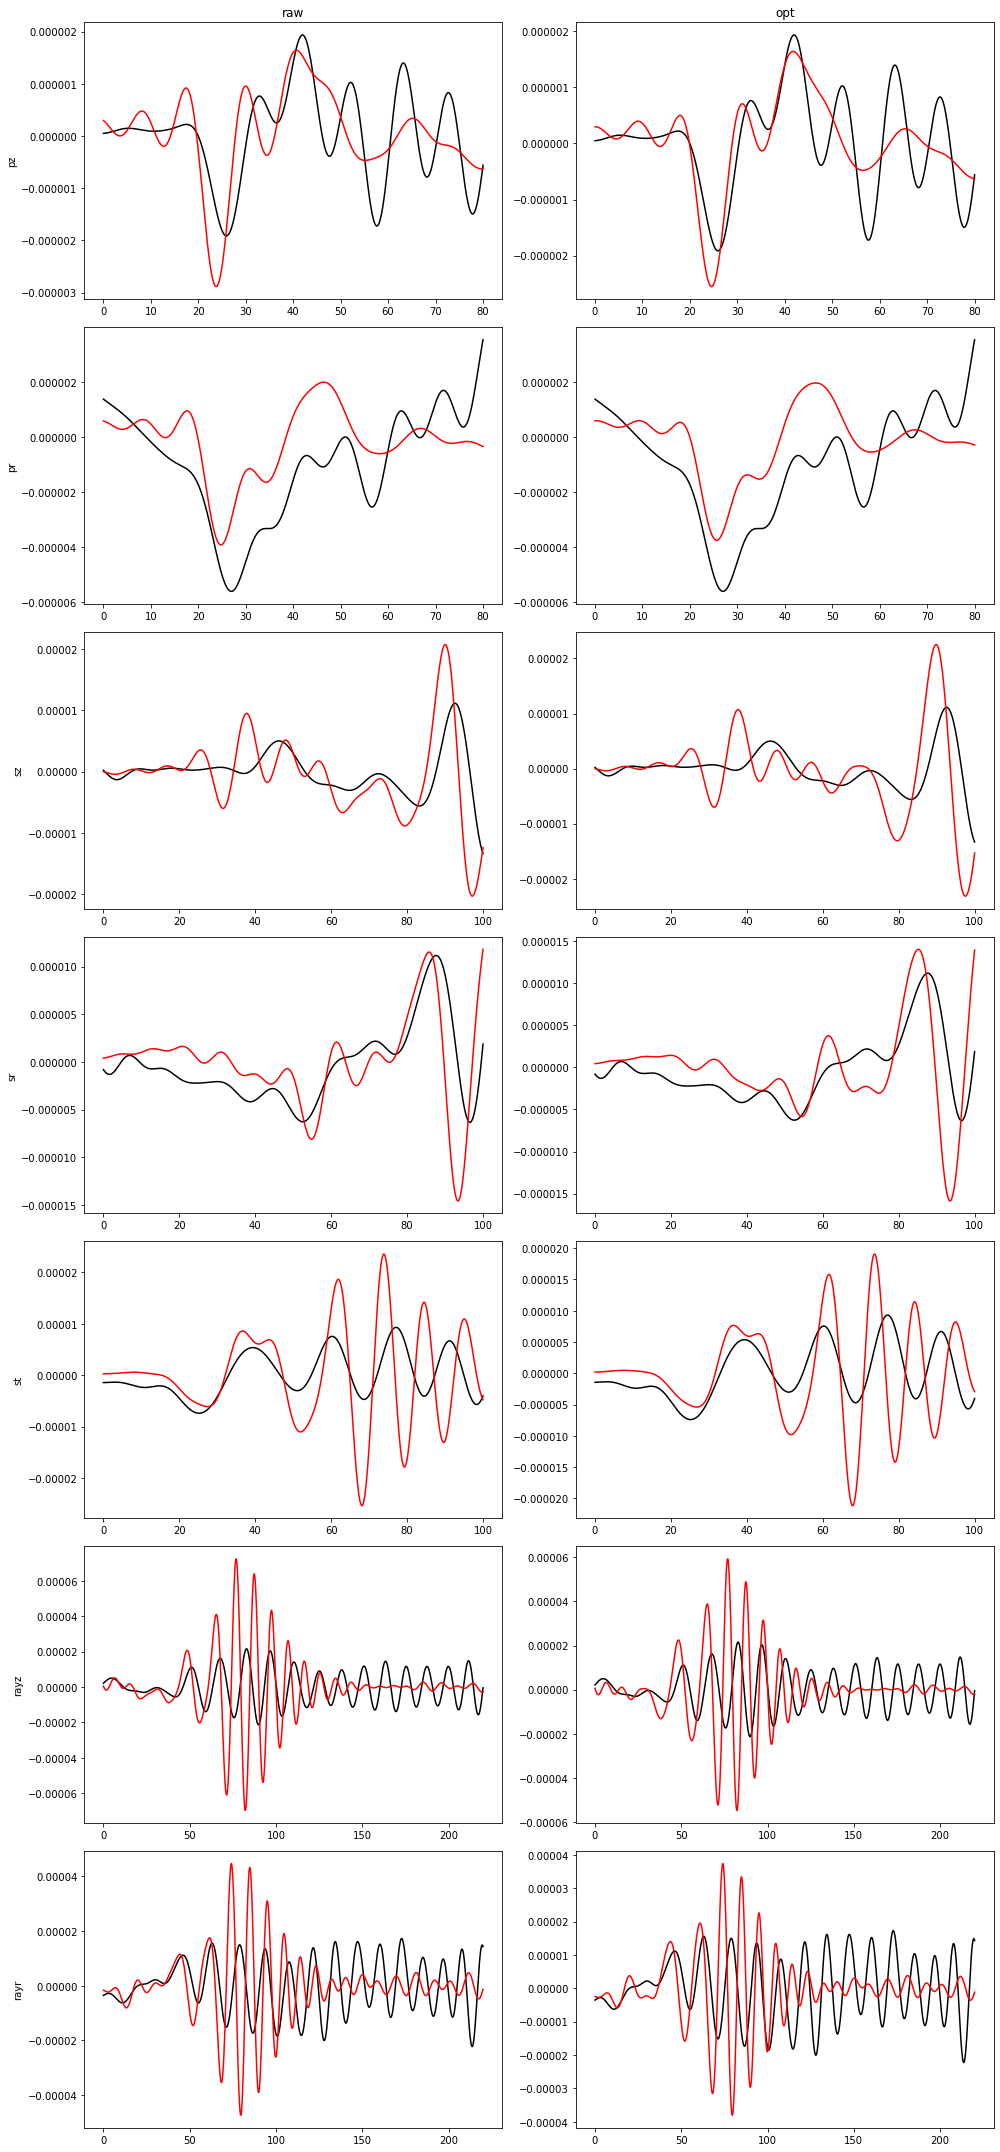

In [55]:
net_sta="BO.OKW"
data_asdf_path="./relocation_newweight/raw_201003300102A.preprocessed_10s_to_120s.h5"
zero_asdf_path="./relocation_newweight/sync_201003300102A_d0_raw.preprocessed_10s_to_120s.h5"
opt_asdf_path="./relocation_newweight/sync_201003300102A_d5_raw.preprocessed_10s_to_120s.h5"
windows_json_body="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.body.json"
windows_json_surf="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.surf.json"

single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf)

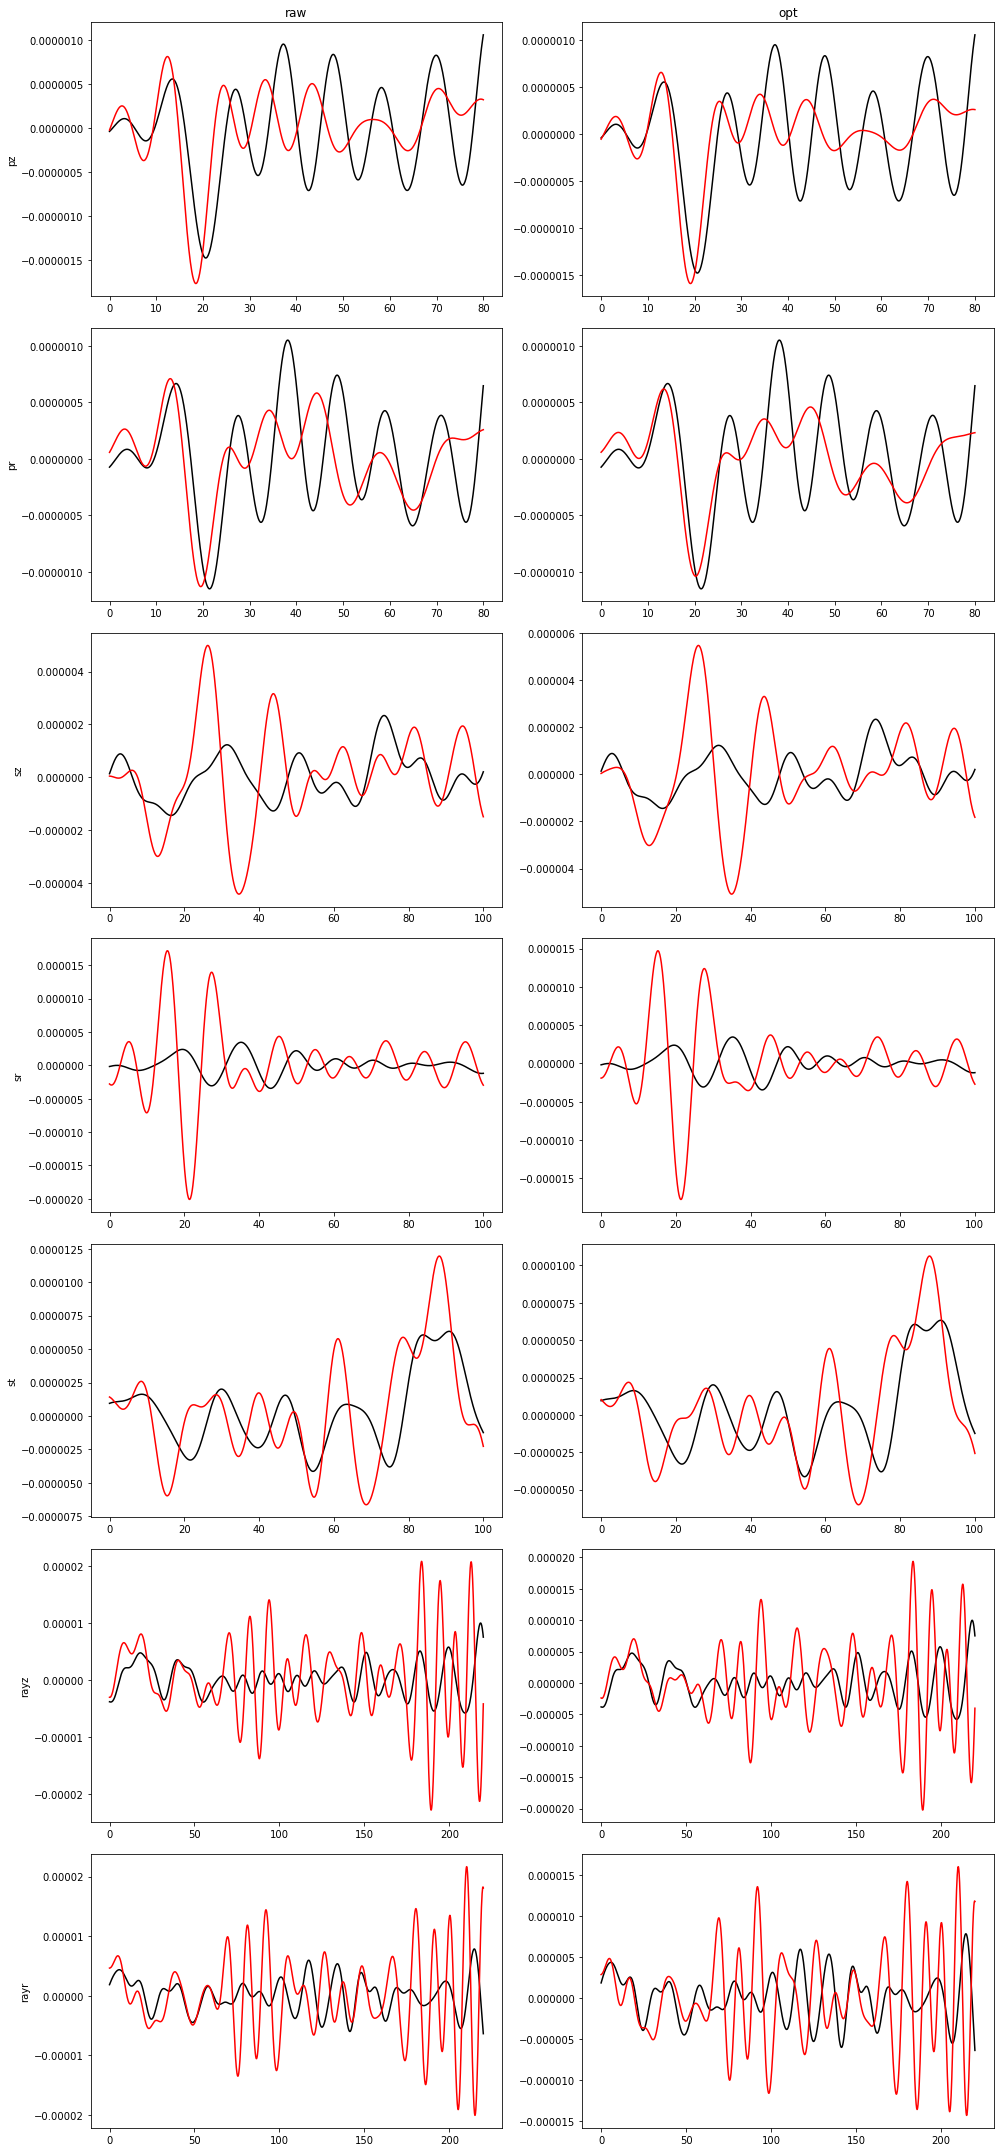

In [56]:
net_sta="TW.YHNB"
data_asdf_path="./relocation_newweight/raw_201003300102A.preprocessed_10s_to_120s.h5"
zero_asdf_path="./relocation_newweight/sync_201003300102A_d0_raw.preprocessed_10s_to_120s.h5"
opt_asdf_path="./relocation_newweight/sync_201003300102A_d5_raw.preprocessed_10s_to_120s.h5"
windows_json_body="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.body.json"
windows_json_surf="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.surf.json"

single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf)

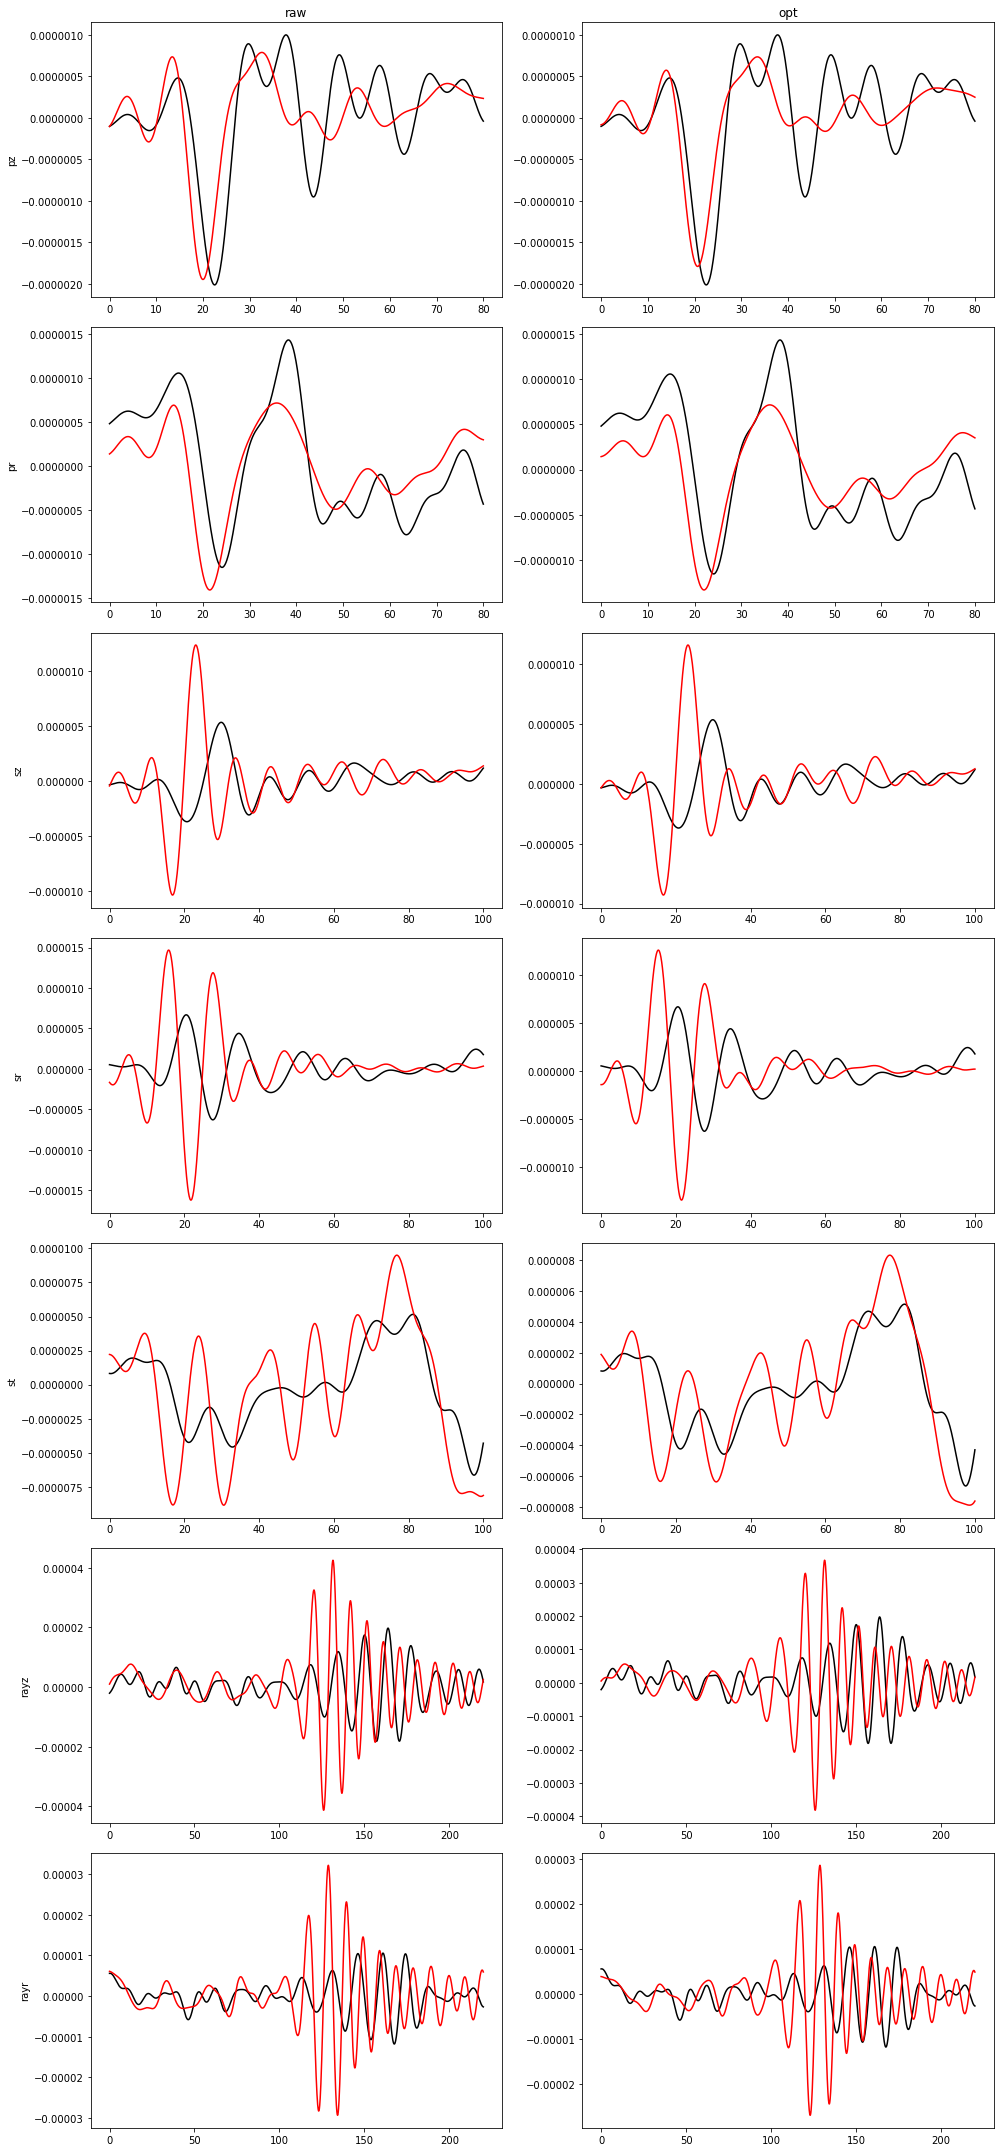

In [57]:
#FJ.PCNP
net_sta="FJ.PCNP"
data_asdf_path="./relocation_newweight/raw_201003300102A.preprocessed_10s_to_120s.h5"
zero_asdf_path="./relocation_newweight/sync_201003300102A_d0_raw.preprocessed_10s_to_120s.h5"
opt_asdf_path="./relocation_newweight/sync_201003300102A_d5_raw.preprocessed_10s_to_120s.h5"
windows_json_body="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.body.json"
windows_json_surf="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.surf.json"

single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf)

## 200912240023A

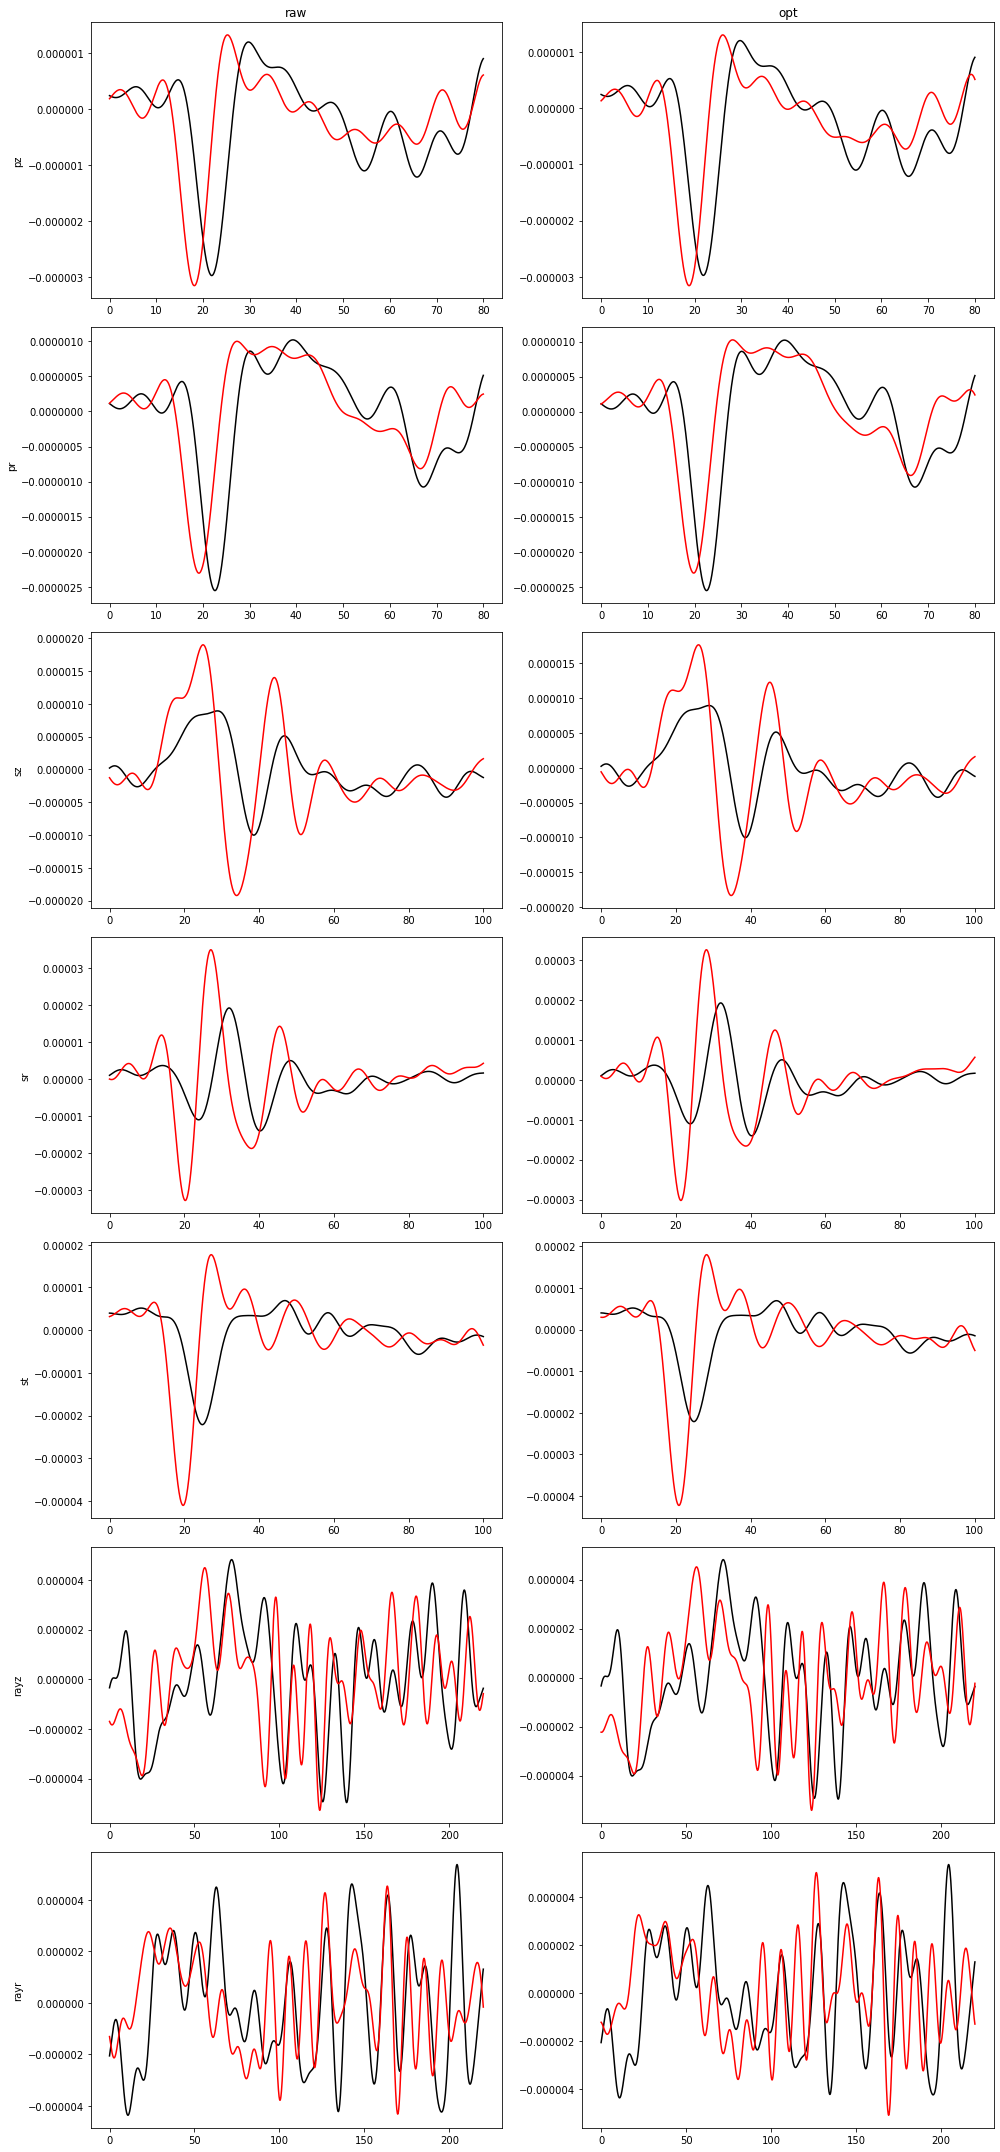

In [60]:
net_sta="TW.YHNB"
data_asdf_path="./relocation_newweight/raw_200912240023A.preprocessed_10s_to_120s.h5"
zero_asdf_path="./relocation_newweight/sync_200912240023A_d0_raw.preprocessed_10s_to_120s.h5"
opt_asdf_path="./relocation_newweight/sync_200912240023A_d-10_raw.preprocessed_10s_to_120s.h5"
windows_json_body="./relocation_newweight/200912240023A.d0.preprocessed_10s_to_120s.body.json"
windows_json_surf="./relocation_newweight/200912240023A.d0.preprocessed_10s_to_120s.surf.json"

single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf)

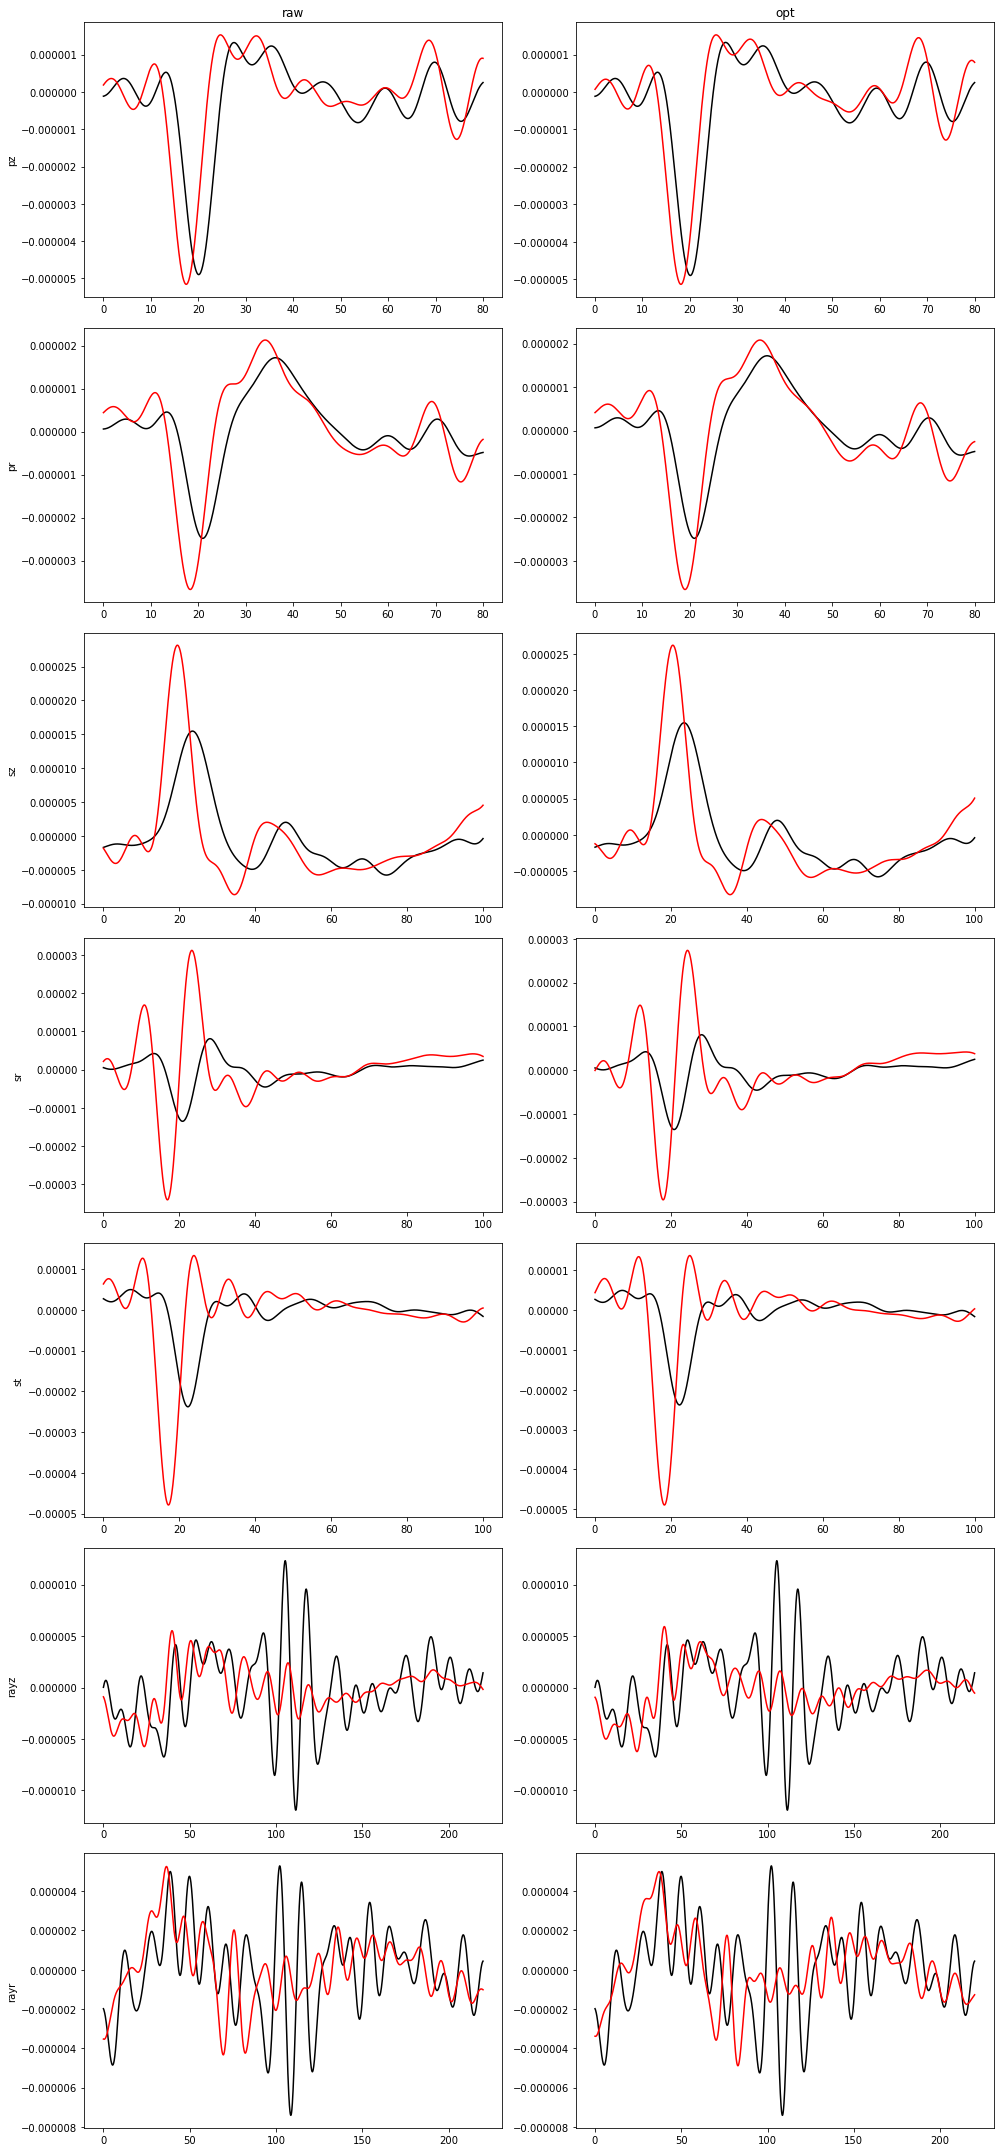

In [61]:
net_sta="FJ.PCNP"
data_asdf_path="./relocation_newweight/raw_200912240023A.preprocessed_10s_to_120s.h5"
zero_asdf_path="./relocation_newweight/sync_200912240023A_d0_raw.preprocessed_10s_to_120s.h5"
opt_asdf_path="./relocation_newweight/sync_200912240023A_d-10_raw.preprocessed_10s_to_120s.h5"
windows_json_body="./relocation_newweight/200912240023A.d0.preprocessed_10s_to_120s.body.json"
windows_json_surf="./relocation_newweight/200912240023A.d0.preprocessed_10s_to_120s.surf.json"

single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf)

## Test using the snr info for each event

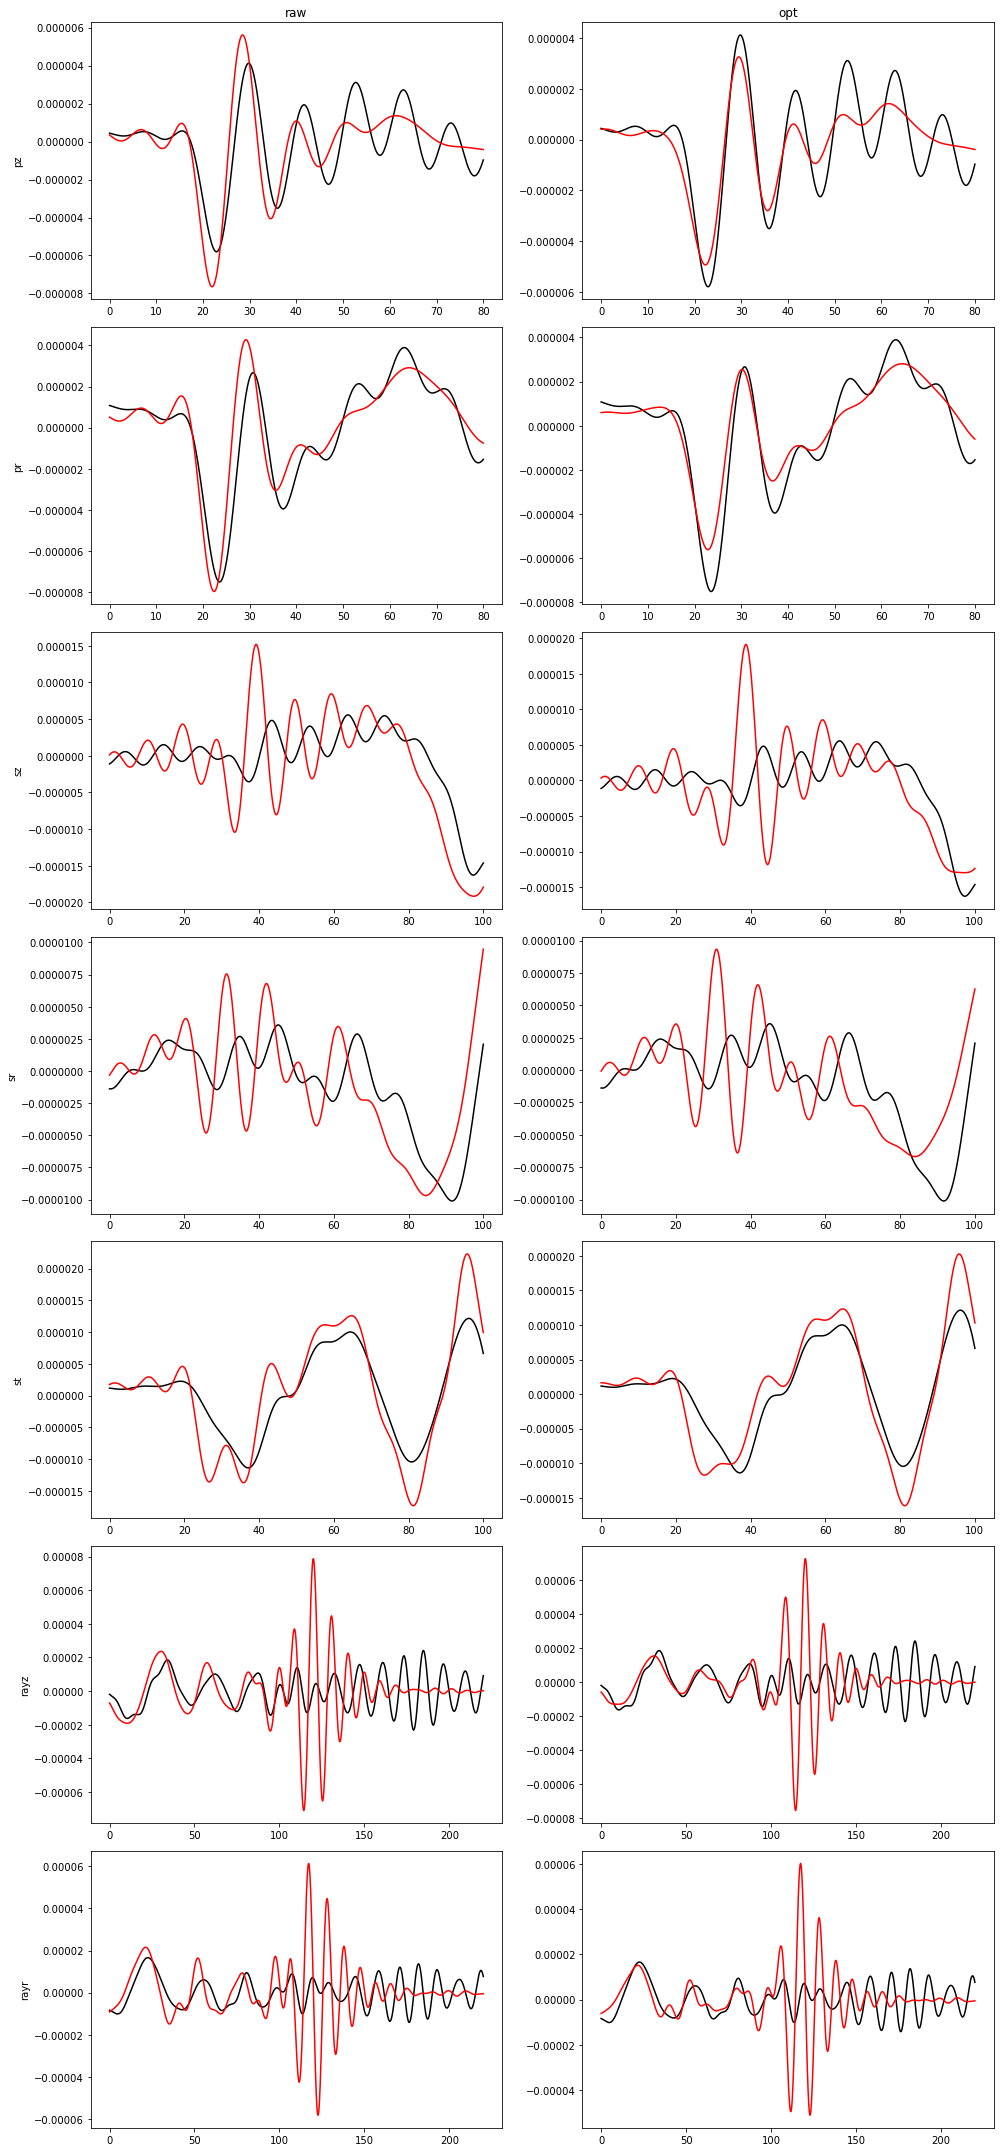

In [66]:
net_sta="BJ.LLM"
data_asdf_path="./relocation_newweight/raw_201003300102A.preprocessed_10s_to_120s.h5"
zero_asdf_path="./relocation_newweight/sync_201003300102A_d0_raw.preprocessed_10s_to_120s.h5"
opt_asdf_path="./relocation_newweight/sync_201003300102A_d5_raw.preprocessed_10s_to_120s.h5"
windows_json_body="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.body.json"
windows_json_surf="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.surf.json"

single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf)

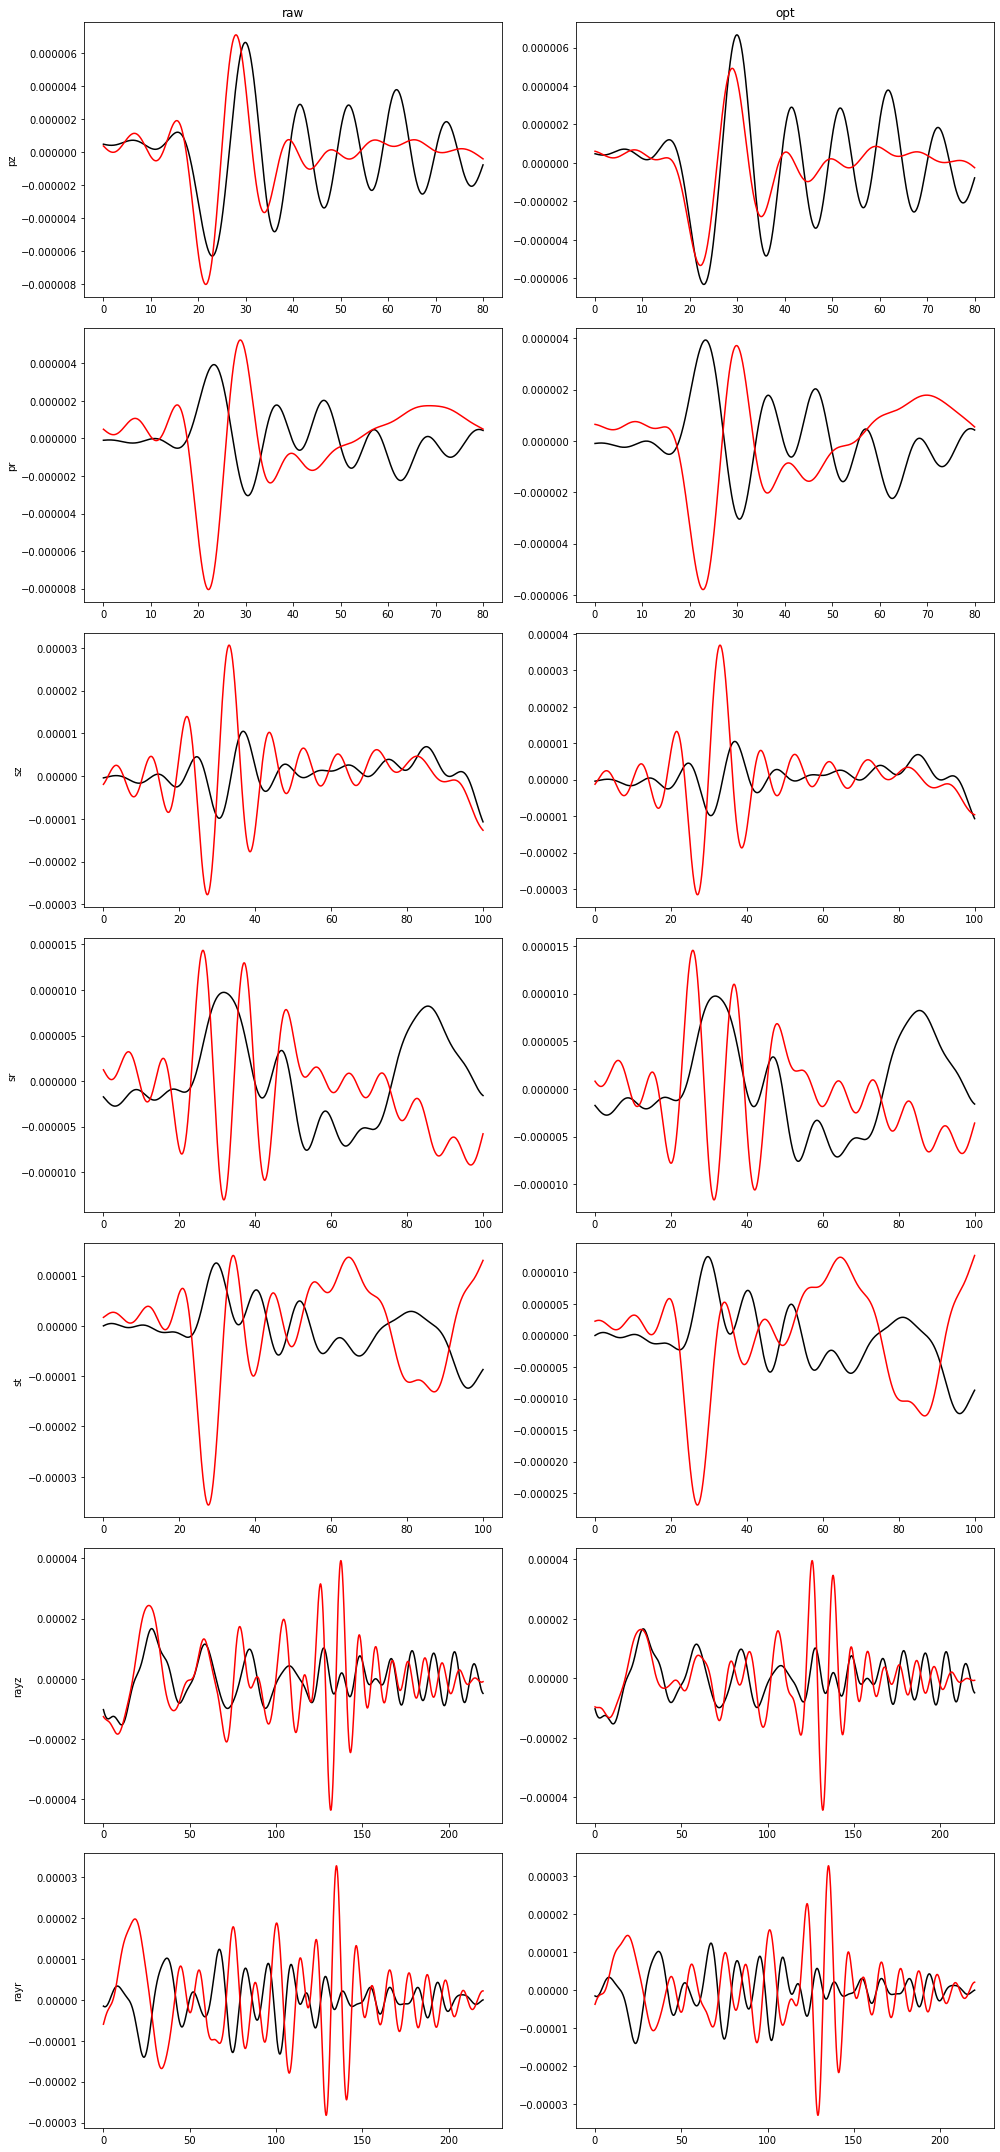

In [67]:
net_sta="BU.WAX"
data_asdf_path="./relocation_newweight/raw_201003300102A.preprocessed_10s_to_120s.h5"
zero_asdf_path="./relocation_newweight/sync_201003300102A_d0_raw.preprocessed_10s_to_120s.h5"
opt_asdf_path="./relocation_newweight/sync_201003300102A_d5_raw.preprocessed_10s_to_120s.h5"
windows_json_body="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.body.json"
windows_json_surf="./relocation_newweight/201003300102A.d0.preprocessed_10s_to_120s.surf.json"

single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf)

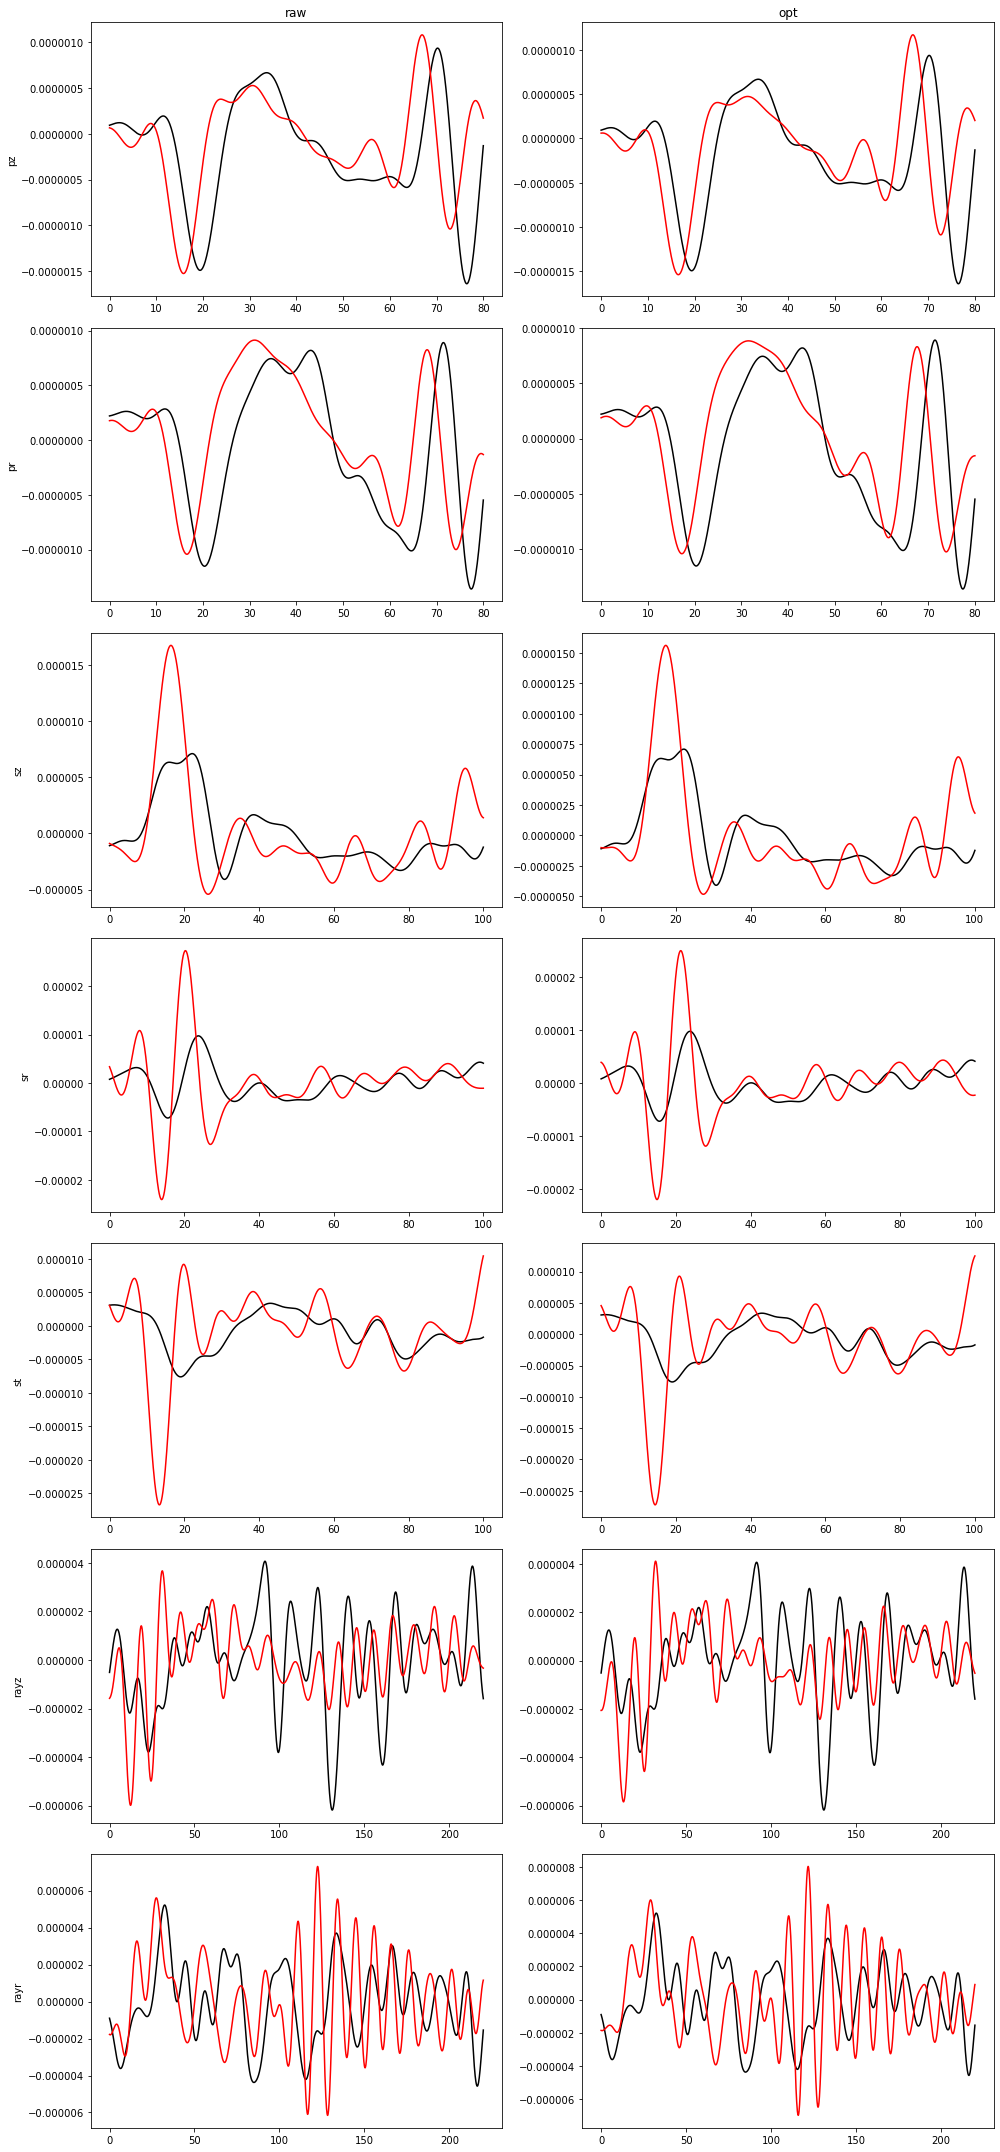

In [69]:
net_sta="BO.IGK"
data_asdf_path="./relocation_newweight/raw_200912240023A.preprocessed_10s_to_120s.h5"
zero_asdf_path="./relocation_newweight/sync_200912240023A_d0_raw.preprocessed_10s_to_120s.h5"
opt_asdf_path="./relocation_newweight/sync_200912240023A_d-10_raw.preprocessed_10s_to_120s.h5"
windows_json_body="./relocation_newweight/200912240023A.d0.preprocessed_10s_to_120s.body.json"
windows_json_surf="./relocation_newweight/200912240023A.d0.preprocessed_10s_to_120s.surf.json"

single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf)

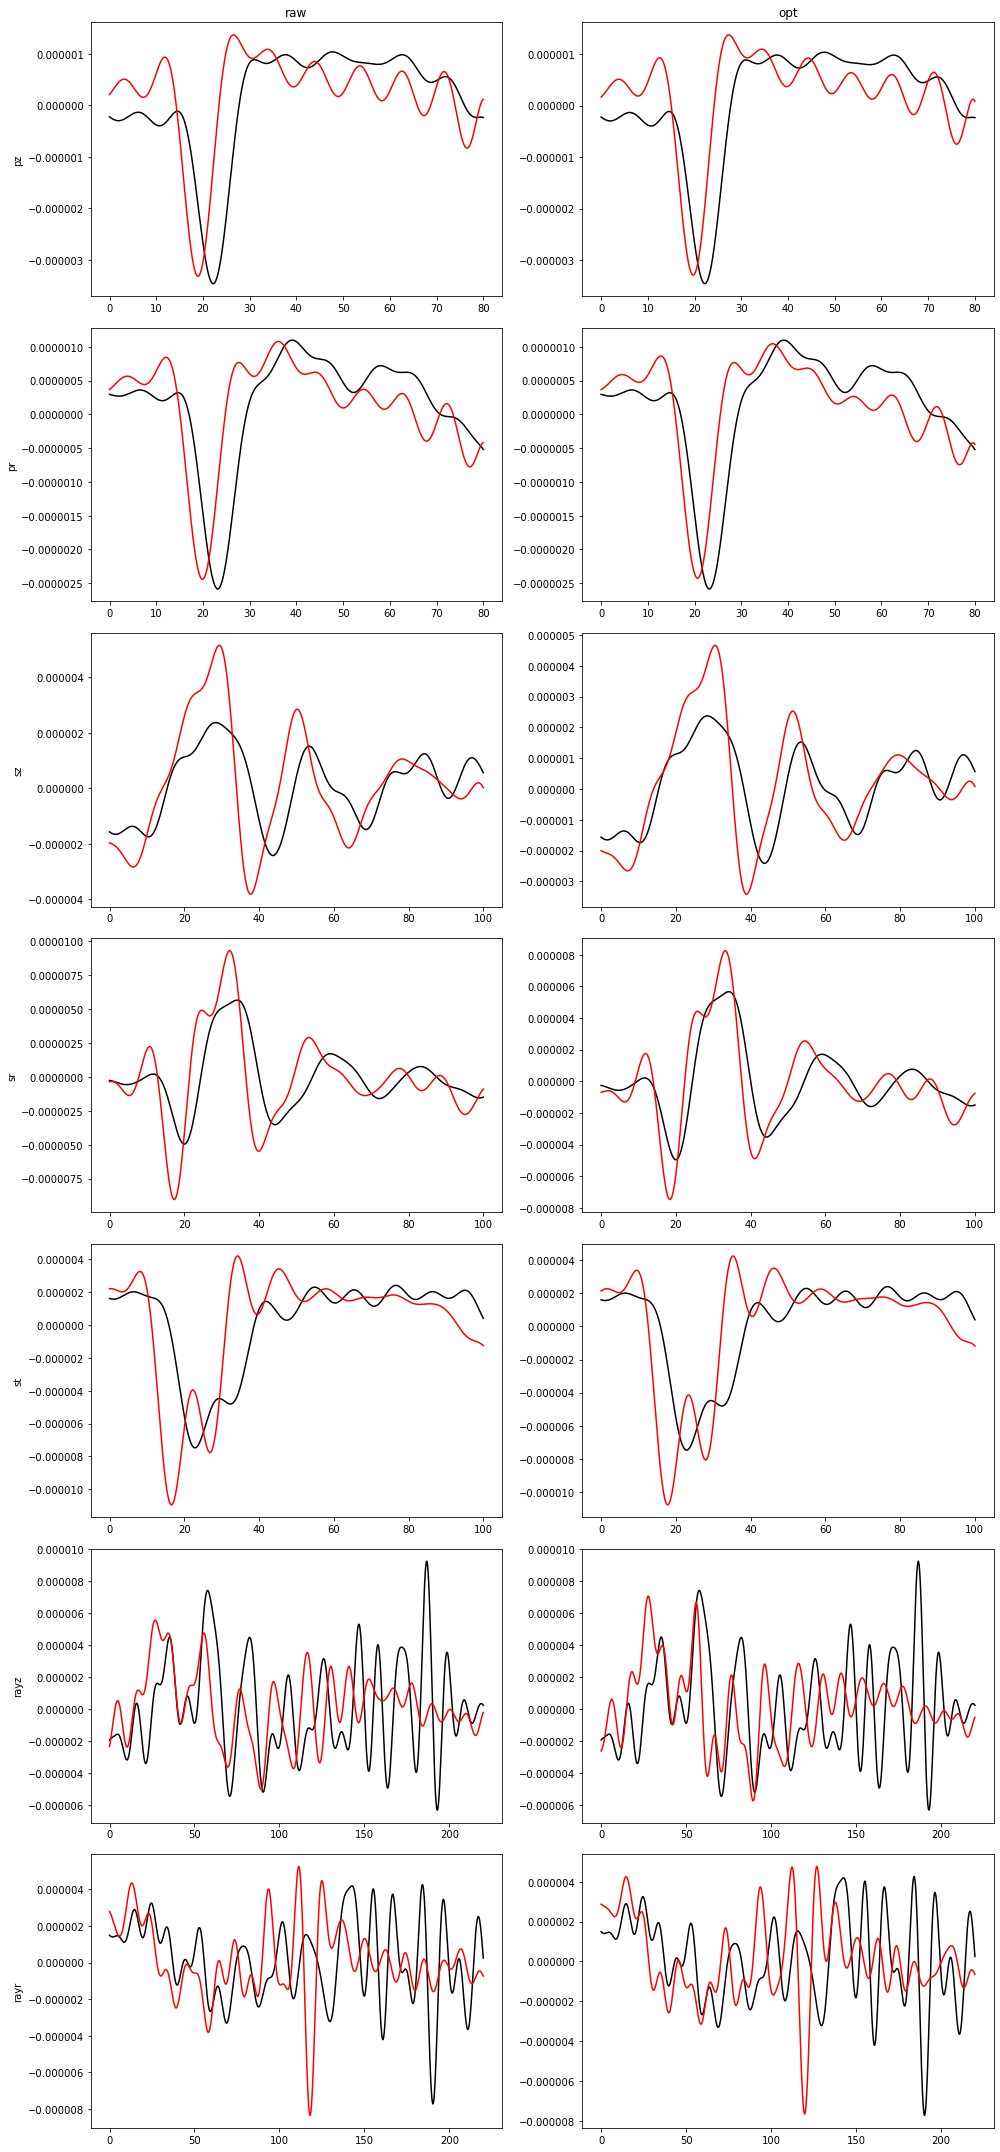

In [70]:
net_sta="GD.HUJ"
data_asdf_path="./relocation_newweight/raw_200912240023A.preprocessed_10s_to_120s.h5"
zero_asdf_path="./relocation_newweight/sync_200912240023A_d0_raw.preprocessed_10s_to_120s.h5"
opt_asdf_path="./relocation_newweight/sync_200912240023A_d-10_raw.preprocessed_10s_to_120s.h5"
windows_json_body="./relocation_newweight/200912240023A.d0.preprocessed_10s_to_120s.body.json"
windows_json_surf="./relocation_newweight/200912240023A.d0.preprocessed_10s_to_120s.surf.json"

single_event_relocation(net_sta,data_asdf_path,zero_asdf_path,opt_asdf_path,windows_json_body,windows_json_surf)